# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [12]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

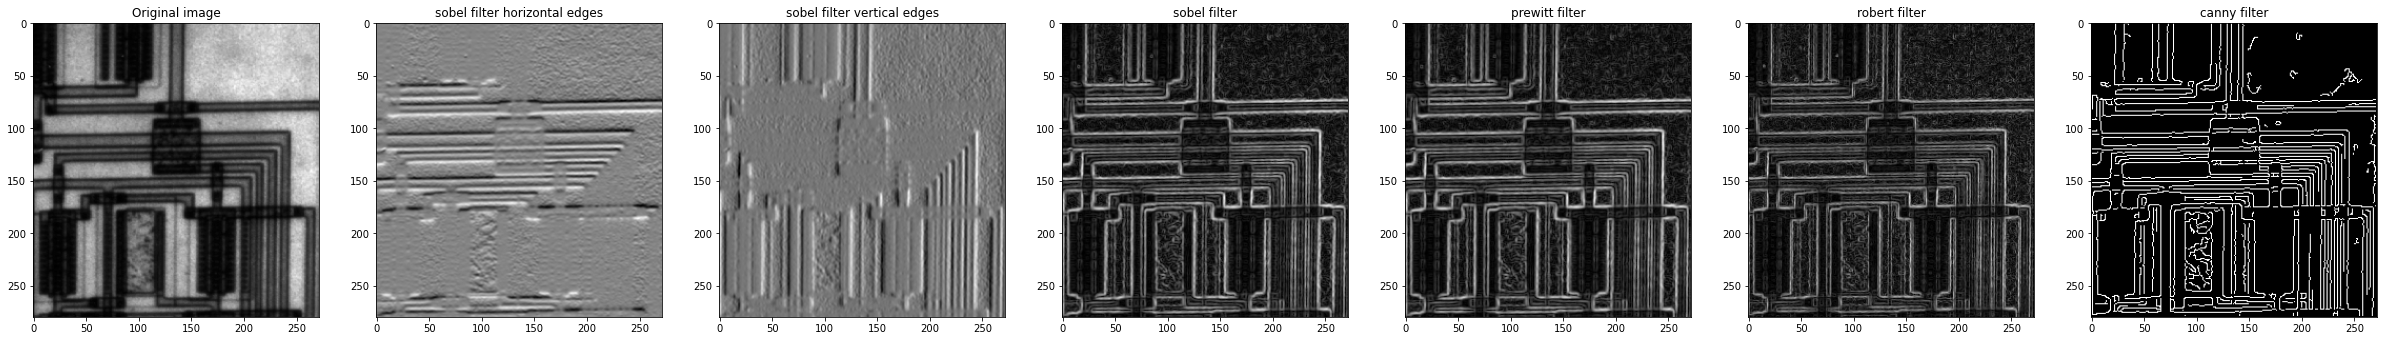

In [14]:
# 1. Built-in Sobel, Prewill, Roberts

img = io.imread('circuit.tif')

sobelH_Image = sobel_h(img)
sobelV_Image = sobel_v(img)
sobel_Image = sobel(img)
prewitt_Image = prewitt(img)
roberts_Image = roberts(img)
canny_Image = canny(img)


show_images(images=[img,sobelH_Image,sobelV_Image,sobel_Image,prewitt_Image,roberts_Image,canny_Image],
            titles=["Original image","sobel filter horizontal edges","sobel filter vertical edges","sobel filter","prewitt filter","robert filter","canny filter"])

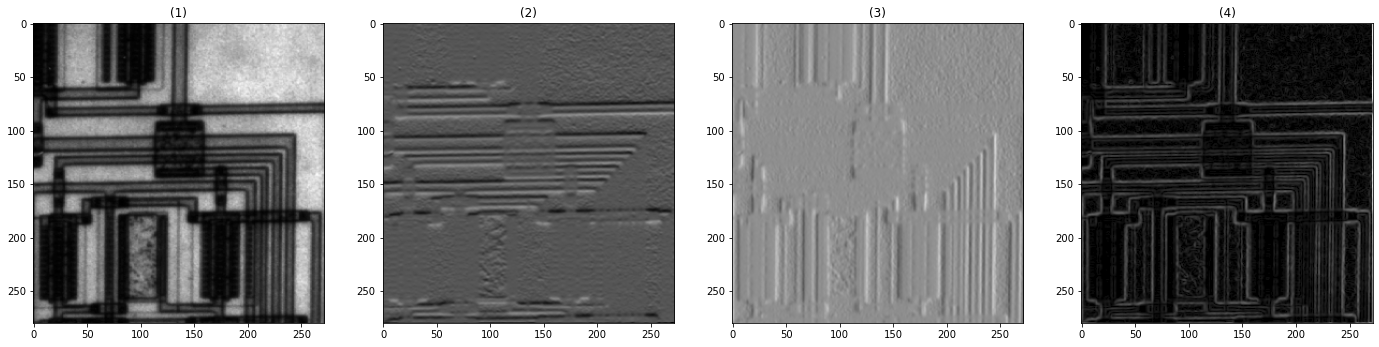

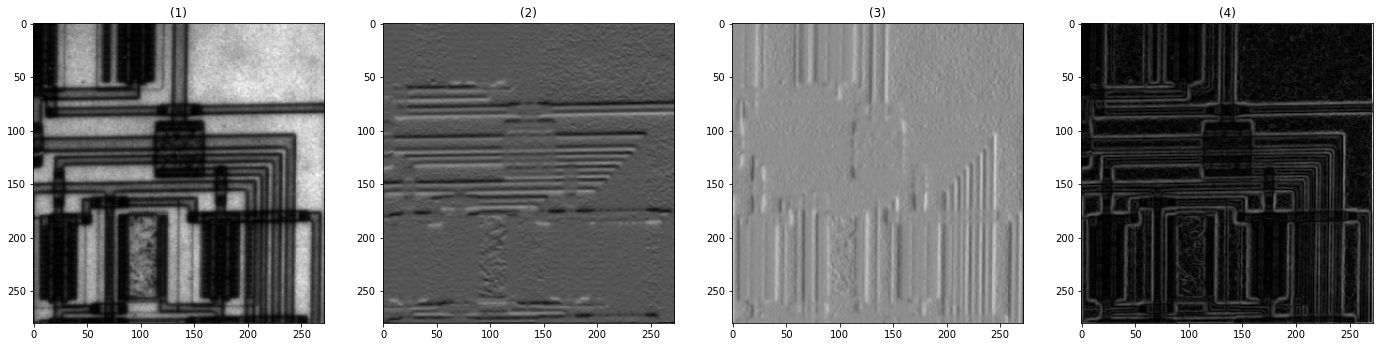

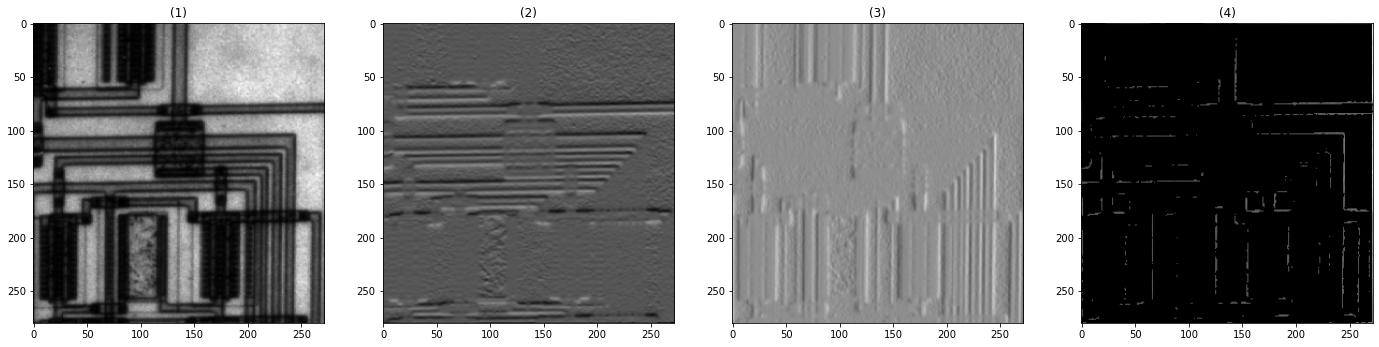

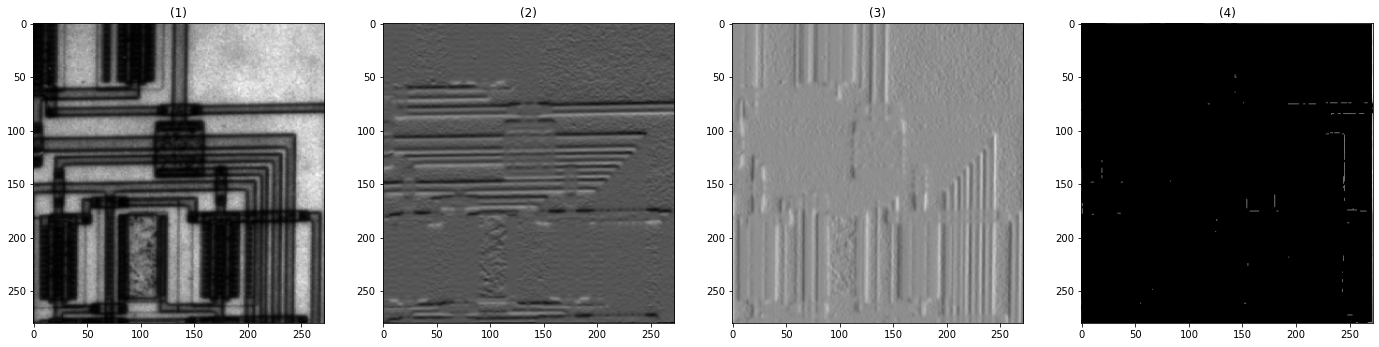

In [15]:
# 2. Custom Sobel (V-H-Both)
def CustomSobel(image,Threshold=20,window_width=3, window_height=3):
    x_temp_img = np.pad(image, (1, 1), 'constant', constant_values=(0))
    y_temp_img = np.pad(image, (1, 1), 'constant', constant_values=(0))
    x_edges_img = np.zeros(image.shape)
    y_edges_img = np.zeros(image.shape)
    xy_edges_img = np.zeros(image.shape)
    
    hx = np.array([
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]
    ])       
    hy = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            x_edges_img[i][j] = np.sum(x_temp_img[i:i+3,j:j+3]*hx, dtype=np.int32)
            y_edges_img[i][j] = np.sum(y_temp_img[i:i+3,j:j+3]*hy, dtype=np.int32)
            
    Xedge = image.shape[0]
    Yedge = image.shape[1]
    xy_edges_img = np.sqrt(x_edges_img[0:Xedge,0:Yedge]**2 + y_edges_img[0:Xedge,0:Yedge]**2)
    xy_edges_img[xy_edges_img<Threshold]=0
    
    return x_edges_img[0:Xedge,0:Yedge],y_edges_img[0:Xedge,0:Yedge],xy_edges_img
    



img = io.imread('circuit.tif')
x,y,xy=CustomSobel(image=img)
show_images(images=[img,x,y,xy])

x,y,xy=CustomSobel(image=img,Threshold=10)
show_images(images=[img,x,y,xy])

x,y,xy=CustomSobel(image=img,Threshold=200)
show_images(images=[img,x,y,xy])

x,y,xy=CustomSobel(image=img,Threshold=250)
show_images(images=[img,x,y,xy])

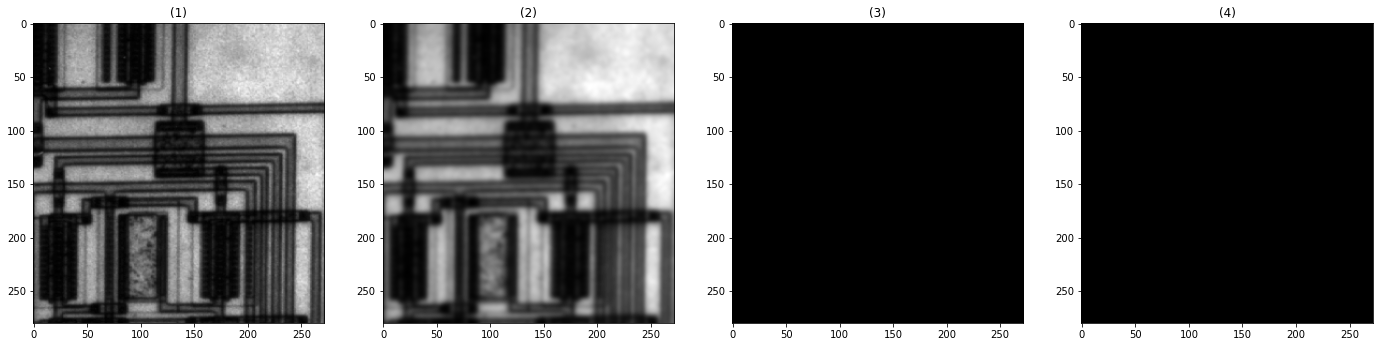

In [16]:
# 3. Custom LoG
thres= 20
def CustomLoG(image,Threshold=20,window_width=3, window_height=3):
    F1 = np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ])   
    F2 = np.array([
        [0,  1, 0],
        [1, -4, 1],
        [0,  1, 0]
    ])


    F1_temp_img = np.pad(image, (1, 1), 'constant', constant_values=(0))
    F2_temp_img = np.pad(image, (1, 1), 'constant', constant_values=(0))
    F1_img = np.zeros(image.shape)
    F2_img = np.zeros(image.shape)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            F1_img[i][j] = np.sum(F1_temp_img[i:i+3,j:j+3]*F1, dtype=np.int32)
            F2_img[i][j] = np.sum(F2_temp_img[i:i+3,j:j+3]*F2, dtype=np.int32)


    Xedge = image.shape[0]
    Yedge = image.shape[1]

    F1_img[F1_img<Threshold]=0
    F2_img[F2_img<Threshold]=0
    return F1_img[0:Xedge,0:Yedge],F2_img[0:Xedge,0:Yedge]


img = io.imread('circuit.tif')
filtteredimg = gaussian(img, sigma=1.8)

f1,f2 = CustomLoG(image=filtteredimg,Threshold=10)
show_images(images=[img,filtteredimg,f1,f2])

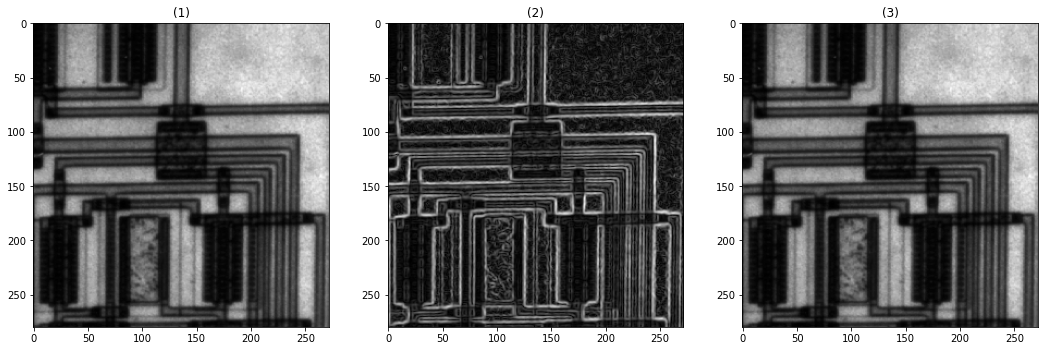

In [17]:

'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

factoredImage = sobel_Image * 0.3
show_images(images=[img,sobel_Image,img-factoredImage])

In [18]:
a = np.arange(9.0).reshape(3,3)


F1 = np.array([
    [-1, -1, -1],
    [-3,  8, -1],
    [-1, -1, -1]
])


anew = a
aneww = np.pad(a, (1, 1), 'constant', constant_values=(0))
print( anew )
print('\n')
print( aneww )
print('\n')

for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        anew[i,j] = np.sum(aneww[i:i+3,j:j+3]*F1, dtype=np.int32)
print( anew[0:a.shape[0],0:a.shape[1]] )


[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


[[0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 0.]
 [0. 3. 4. 5. 0.]
 [0. 6. 7. 8. 0.]
 [0. 0. 0. 0. 0.]]


[[-8. -6.  4.]
 [ 6. -6. 10.]
 [34. 18. 34.]]
